## Проект: Линейные модели в машинном обучении

## Описание проекта
Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке.

**ПЛАН:**
- загрузим данные
- проведем предобработку (изменим названия стобцов, проверим наличие явных/неявных дубликатов)
- проведем исследовательский анализ
- Проведем корреляционный анализ
- обучим модели машинного обучения (после сравним их, их метрики и тд)
- обучим финальную модель
- сделаем выводы

In [1]:
# для начала стоит импортировать все нужные библиотеки и метрики
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (r2_score, mean_squared_error, 
                             mean_absolute_error, accuracy_score, 
                             precision_score, recall_score)
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy import stats as st

## 1. Загрузка данных

**1.1 Загрузите данные в датафреймы pandas**

In [2]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal = ',')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';', decimal = ',')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';', decimal = ',')

In [3]:
# выведем ferma_main
display(ferma_main)
ferma_main.info()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [4]:
# выведем ferma_dad
display(ferma_dad)
ferma_dad.info()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [5]:
# выведем cow_buy
display(cow_buy)
cow_buy.info()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


**Вывод по общей информации:**
- ferma_main
    - поменять название некторых столбцов
    - одинаковые значения в столбцах записаны по разному (Пример: равнинное / равнинные)
    - пропущенных значений не наблюдается
    - все типы данных в порядке
- ferma_dad
    - поменять название столбцов 
    - пропущенных значений не наблюдается
    - все типы данных в порядке
- cow_buy
    - поменять название столбцов 
    - пропущенных значений не наблюдается
    - все типы данных в порядке
    
    

**1.2 Изучите данные. Определите, соответствуют ли они описанию задачи и изученным в прошлых спринтах стандартам оформления данных. При необходимости переименуйте столбцы**

In [6]:
# изменим название столбцов в ferma_main
ferma_main.rename(columns={'Удой, кг' : 'удой', 'ЭКЕ (Энергетическая кормовая единица)' : 'эке',
                           'Сырой протеин, г' : 'сырой_протеин', 'СПО (Сахаро-протеиновое соотношение)': 'спо',
                          'Порода' : 'порода', 'Тип пастбища' : 'тип_пастбища', 'порода папы_быка' : 'порода_папы',
                          'Жирность,%' : 'жирность', 'Белок,%' : 'белок', 'Вкус молока' : 'вкус_молока', 
                          'Возраст' : 'возраст'}, inplace = True)
display(ferma_main.head())

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [7]:
# изменим название столбцов в ferma_dad
ferma_dad.rename(columns = {'Имя Папы' : 'имя_папы'}, inplace = True)
display(ferma_dad.head())

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [8]:
# изменим название столбцов в cow_buy
cow_buy.rename(columns = {'Порода' : 'порода', 'Тип пастбища' : 'тип_пастбища', 
                         'порода папы_быка' : 'порода_папы', 'Имя_папы' : 'имя_папы', 
                         'Текущая_жирность,%' : 'текущая_жирность', 'Текущий_уровень_белок,%' : 'текущий_белок', 
                         'Возраст' : 'возраст'}, inplace = True)
display(cow_buy.head())

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,текущий_белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


##  Предобработка данных

In [9]:
# перед предобработкой стоит зафиксировать размеры таблиц, чтобы после предобработки сравнить их
ferma_main_shape = ferma_main.shape[0]
ferma_dad_shape = ferma_dad.shape[0]
cow_buy_shape = cow_buy.shape[0]
print(ferma_main_shape)
print(ferma_dad_shape)
print(cow_buy_shape)

634
629
20


### проверим наличие явных дубликатов

In [10]:
print(ferma_main.duplicated().sum())
print(ferma_dad.duplicated().sum())
print(cow_buy.duplicated().sum())

5
0
4


In [11]:
# удалим явные дубликаты в ferma_main
ferma_main.drop_duplicates(inplace = True)
print(ferma_main.duplicated().sum())

# в ferma_dad дубликатов нет

# в cow_buy дубликатов 4, но так как это 20% о всего DataFrame, то лучше не удалять

0


### проверим наличие неявных дубликатов

#### ferma_main

In [12]:
print(ferma_main['порода'].unique(), ferma_main['тип_пастбища'].unique(), ferma_main['порода_папы'].unique(),  
     ferma_main['вкус_молока'].unique(), ferma_main['возраст'].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг'] ['Равнинное' 'Равнинные' 'Холмистое'] ['Айдиал' 'Соверин' 'Айдиалл'] ['вкусно' 'не вкусно'] ['более_2_лет' 'менее_2_лет']


*выявились 2 неявных дубликата: **Равнинное / Равнинные, Айдиал / Айдиалл**.*

In [13]:
# заменим неявные дуликаты
ferma_main['тип_пастбища'].replace({'Равнинные' : 'Равнинное'}, inplace = True)
ferma_main['порода_папы'].replace({'Айдиалл' : 'Айдиал'}, inplace = True)

# Проверим
print(ferma_main['тип_пастбища'].unique(), ferma_main['порода_папы'].unique())


['Равнинное' 'Холмистое'] ['Айдиал' 'Соверин']


#### ferma_dad

In [14]:
print(ferma_dad['имя_папы'].unique())

['Буйный' 'Соловчик' 'Барин' 'Геркулес']


*в ferma_dad неявных дубликатов нет*

#### cow_buy

In [15]:
print(cow_buy['порода'].unique(), cow_buy['тип_пастбища'].unique(), cow_buy['порода_папы'].unique(),  
     cow_buy['имя_папы'].unique(), cow_buy['возраст'].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг'] ['холмистое' 'равнинное'] ['Айдиал' 'Соверин'] ['Геркулес' 'Буйный' 'Барин' 'Соловчик'] ['более_2_лет' 'менее_2_лет']


в cow_buy неявных дубликатов нет, но видно что в столбце тип_пастбища по сравнению с таким же столбцом названия написаны с маленькой буквы, если в дальнейшем придется объединять таблицы, то лучше сразу изменить названия

In [16]:
cow_buy['тип_пастбища'].replace({'холмистое' : 'Холмистое', 'равнинное' : 'Равнинное'}, inplace = True)

# проверка
print(cow_buy['тип_пастбища'].unique())
    

['Холмистое' 'Равнинное']


*Так как мы ничего не удаляли (кроме дубликатов в ferma_main, и то, их было очень мало, по сравнению со всей таблицей), то нет смысла сравнивать таблицы до и после предобработки*

**Вывод по предобработке:**
- названия столбцов изменены
- удалены 5 явных дубликатов в ferma_main
- изменены 2 неявных дубликата в ferma_main
- в cow_buy типы пастбищ написаны с заглавной буквы

## Исследовательский анализ данных

- Проведите статистический анализ всех признаков.
- Постройте графики для каждого признака. Помните, что количественным и категориальным признакам подходят разные графики.
- Сделайте выводы о данных:
    - напишите, заметили ли вы выбросы, необычное распределение количественных признаков или другие особенности;
    - расскажите, как вы планируете улучшить данные.

In [17]:
ferma_main.describe().T

,count,mean,std,min,25%,50%,75%,max
id,629.0,315.000000,181.720940,1.000,158.000,315.000,472.000,629.000
удой,629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
эке,629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
сырой_протеин,629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
спо,629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
жирность,629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
белок,629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085


*Видно аномальное значение **max удой = 45616 кг**, это довольно странно, учитывая то, что в среднем корова дает 1664 кг*

### Проведем анализ

### Количественные признаки

#### 1. Удой

In [18]:
# для начала посмотрим, есть ли еще такие большие значения
print(ferma_main['удой'].sort_values(ascending = False))

16     45616
70      7222
135     7207
296     7201
294     7197
       ...  
578     5235
322     5215
589     5213
397     5207
273     5204
Name: удой, Length: 629, dtype: int64


*Видим, что остальные значения в норме*

Text(0.5, 0, 'удой коровы в год')

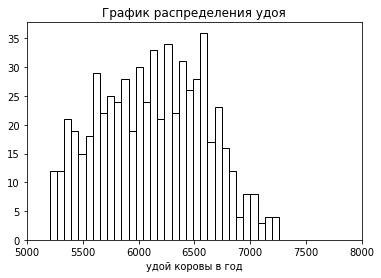

In [19]:
# построим график распределения
plt.hist(ferma_main['удой'], bins = 629, color = 'white', edgecolor = 'black')
plt.xlim(5000, 8000)
plt.title('График распределения удоя')
plt.xlabel('удой коровы в год')


Text(0.5, 0, 'удой коровы в год')

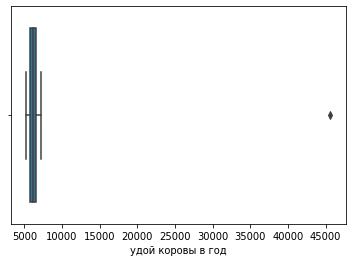

In [20]:
# построим ящик с усами
sns.boxplot(x = ferma_main['удой'])
plt.xlabel('удой коровы в год')

*Делаем вывод о том, что это аномальное значение и его можно удалить*

In [21]:
ferma_main = ferma_main.query('удой != 45616')
print(ferma_main['удой'].max())

7222


#### 2. эке

Text(0.5, 0, 'Показатель эке для коров')

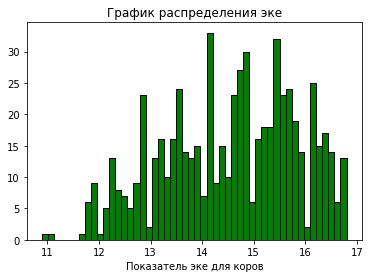

In [22]:
plt.hist(ferma_main['эке'], bins = 50, color = 'green', edgecolor = 'black')
plt.title('График распределения эке')
plt.xlabel('Показатель эке для коров')

Text(0.5, 0, 'Показатель эке для коров')

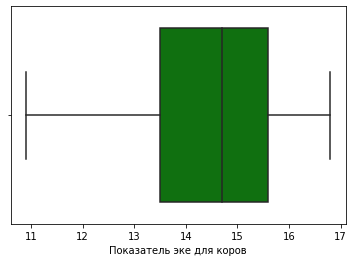

In [23]:
sns.boxplot(x = ferma_main['эке'], color = 'green')
plt.xlabel('Показатель эке для коров')

*Распределение эке практически нормальное, нет анамальных значений, **пиковые значения: 14, 16**. Медианное значение почти у отметки 15*

#### 3. Сырой протеин

Text(0.5, 0, 'Показатель сырого протеина для коров')

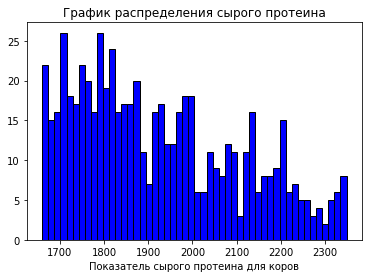

In [24]:
plt.hist(ferma_main['сырой_протеин'], bins = 50, color = 'blue', edgecolor= 'black')
plt.title('График распределения сырого протеина')
plt.xlabel('Показатель сырого протеина для коров')

Text(0.5, 0, 'Показатель сырого протеина для коров')

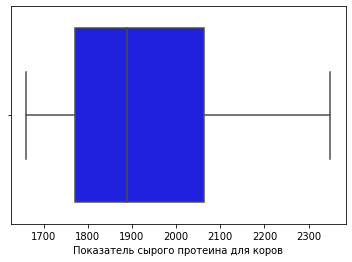

In [25]:
sns.boxplot(x = ferma_main['сырой_протеин'], color = 'blue')
plt.xlabel('Показатель сырого протеина для коров')

*Распределение сырого протеина тоже можно считать близким к нормальному, хотелось бы отметить, что **основная масса находится до 1800 г**.*

#### 4. спо

Text(0.5, 0, 'Показатель отношения сахара к протеину')

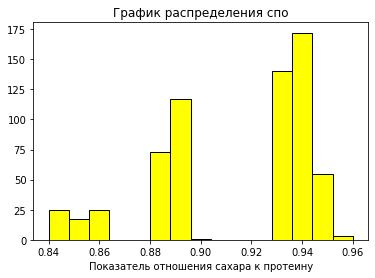

In [26]:
plt.hist(ferma_main['спо'], bins = 15, color = 'yellow', edgecolor = 'black')
plt.title('График распределения спо')
plt.xlabel('Показатель отношения сахара к протеину')

Text(0.5, 0, 'Показатель отношения сахара к протеину')

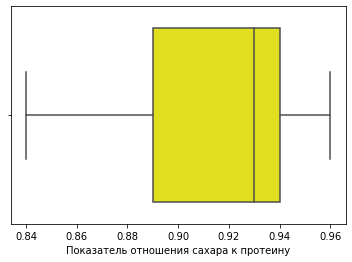

In [27]:
sns.boxplot(x = ferma_main['спо'], color = 'yellow')
plt.xlabel('Показатель отношения сахара к протеину')

*Больше всего значений находятся на отметке в **0.94**, нельзя сказать, что распределение нормальное, а выбросов не наблюдается*

#### 5. жирность

Text(0.5, 0, 'Показатель жирности в молоке')

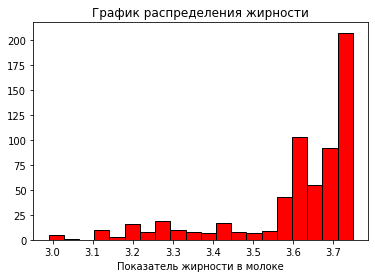

In [28]:
plt.hist(ferma_main['жирность'], bins = 20, color = 'red', edgecolor = 'black')
plt.title('График распределения жирности')
plt.xlabel('Показатель жирности в молоке')

Text(0.5, 0, 'Показатель жирности в молоке')

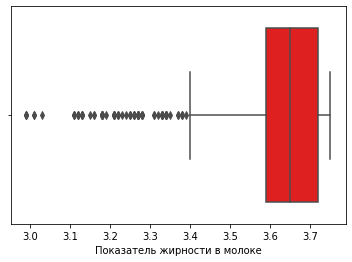

In [29]:
sns.boxplot(x = ferma_main['жирность'], color = 'red')
plt.xlabel('Показатель жирности в молоке')

*Видим выбросы до отметки в 3.4*

In [30]:
# рассмотрим эти выбросы
display(ferma_main.query('жирность < 3.4'))

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет
10,11,5591,13.7,1678,0.895,РефлешнСоверинг,Холмистое,Айдиал,3.13,3.075,вкусно,менее_2_лет
17,18,5777,12.4,1873,0.895,Вис Бик Айдиал,Холмистое,Айдиал,3.03,3.080,вкусно,более_2_лет
24,25,5372,13.2,1703,0.895,Вис Бик Айдиал,Равнинное,Айдиал,3.31,3.078,не вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
587,588,5610,14.7,1671,0.880,Вис Бик Айдиал,Равнинное,Айдиал,3.18,3.079,не вкусно,более_2_лет
589,590,5213,12.1,2016,0.880,РефлешнСоверинг,Равнинное,Соверин,3.19,3.076,не вкусно,менее_2_лет
591,592,5520,11.9,1785,0.880,Вис Бик Айдиал,Равнинное,Соверин,3.12,3.073,не вкусно,менее_2_лет
602,603,5594,12.3,1742,0.880,Вис Бик Айдиал,Равнинное,Айдиал,3.11,3.077,вкусно,менее_2_лет


In [31]:
print(f'отношение строк с жироностью меньше 3.4 к общему числу строк = {ferma_main.query("жирность < 3.4").shape[0] / ferma_main.shape[0]}')

отношение строк с жироностью меньше 3.4 к общему числу строк = 0.13694267515923567


*Мы получили что отношение строк с жироностью меньше 3.4 к общему числу строк равное примерно 13%, это довольно большое количество, и с учетом того, что после обработки DataFrame по общепринятым суждениям должно остаться не менее 90% от изначального размера, то лучше будет не удалять строки с этими выбросами*

#### 6. белок

Text(0.5, 0, 'Показатель белка в молоке')

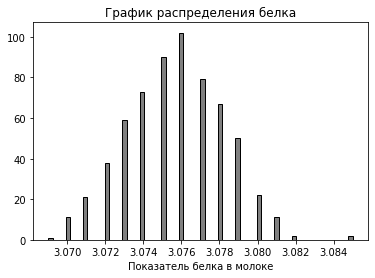

In [32]:
plt.hist(ferma_main['белок'], bins = 70, color = 'grey', edgecolor = 'black')
plt.title('График распределения белка')
plt.xlabel('Показатель белка в молоке')

Text(0.5, 0, 'Показатель белка в молоке')

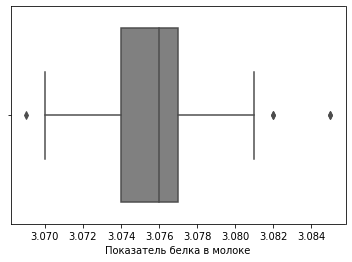

In [33]:
sns.boxplot(x = ferma_main['белок'], color = 'grey')
plt.xlabel('Показатель белка в молоке')

*Видим выбросы, стоит их рассмотреть*

In [34]:
display(ferma_main.query('3.07 > белок or белок > 3.081'))

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст
77,78,5871,14.7,1795,0.895,Вис Бик Айдиал,Равнинное,Айдиал,3.61,3.082,вкусно,более_2_лет
240,241,5568,13.4,1733,0.880,Вис Бик Айдиал,Равнинное,Соверин,3.63,3.069,не вкусно,менее_2_лет
426,427,6701,15.7,2068,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.72,3.082,вкусно,более_2_лет
471,472,5883,14.9,2159,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.62,3.085,вкусно,более_2_лет
517,518,5819,13.7,1968,0.840,Вис Бик Айдиал,Холмистое,Айдиал,3.15,3.085,вкусно,более_2_лет


In [35]:
# удалим эти выбросы, так как их количество невелико
ferma_main = ferma_main.query('3.07 <= белок < 3.081')

# проверка
display(ferma_main.query('3.07 > белок or белок > 3.081'))

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст


*аномальные значения были удалены, а в остальном все хорошо, распределение нормальное, никаких других критических факторов не наблюдается*

### Категориальные признаки

#### 1. порода

In [36]:
# для началы посмотрим, какие породы есть
print(ferma_main['порода'].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']


Text(0.5, 1.0, 'Распределение пород')

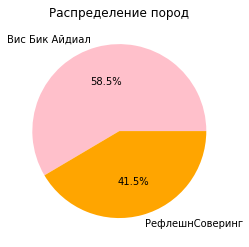

In [37]:
plt.pie(ferma_main['порода'].value_counts(), labels = ['Вис Бик Айдиал ', 'РефлешнСоверинг'],
        autopct = '%1.1f%%', colors = ['pink', 'orange'])
plt.title('Распределение пород')

*Распределение пород близко к нормальному. Коров с породой **Вис Бик Айдиал - 58.5%, РефлешнСоверинг - 41.5%**.*

#### 2. тип пастбища

In [38]:
# для началы посмотрим, какие типы пастбищ есть
print(ferma_main['тип_пастбища'].unique())

['Равнинное' 'Холмистое']


Text(0.5, 1.0, 'Распределение пастбищ')

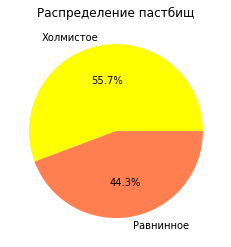

In [39]:
plt.pie(ferma_main['тип_пастбища'].value_counts(), labels = ['Холмистое', 'Равнинное'],
        autopct = '%1.1f%%', colors = ['yellow', 'coral'])
plt.title('Распределение пастбищ')

*Распределение пастбищ близко к нормальному. **Холмистое - 55.7%, равнинное - 44.3%**.*

#### 3. порода папы

In [40]:
# для началы посмотрим, какие породы папы есть
print(ferma_main['порода_папы'].unique())

['Айдиал' 'Соверин']


Text(0.5, 1.0, 'Распределение пород пап')

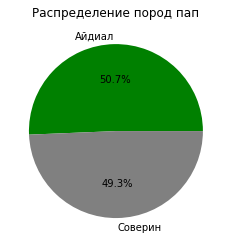

In [41]:
plt.pie(ferma_main['порода_папы'].value_counts(), labels = ['Айдиал', 'Соверин'], colors = ['green', 'grey'], 
        autopct = '%1.1f%%')
plt.title('Распределение пород пап')

*Распределение пород папы быка практически находится в соотношении 1:1. **Айдиал - 50.7%, Соверин - 49.3%**.*

#### 4. вкус молока

In [42]:
# для началы посмотрим, какие вкусы молока есть
print(ferma_main['вкус_молока'].unique())

['вкусно' 'не вкусно']


Text(0.5, 1.0, 'Распределение вкуса молока')

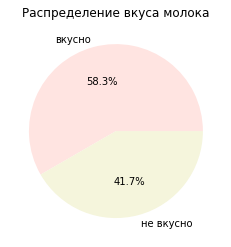

In [43]:
plt.pie(ferma_main['вкус_молока'].value_counts(), labels = ['вкусно', 'не вкусно'], colors = ['mistyrose', 'beige'], 
        autopct = '%1.1f%%')
plt.title('Распределение вкуса молока')

*Видим, что большая часть молока - вкусная. **Вкусно - 58.3%, Не вкусно - 41.7%**.*

#### 5. возраст

In [44]:
# для началы посмотрим, какие возраста есть
print(ferma_main['возраст'].unique())

['более_2_лет' 'менее_2_лет']


Text(0.5, 1.0, 'Распределение возрастов')

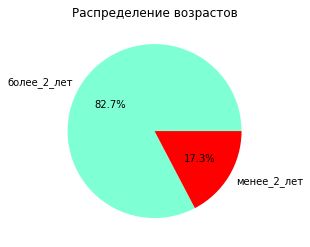

In [45]:
plt.pie(ferma_main['возраст'].value_counts(), labels = ['более_2_лет', 'менее_2_лет'], colors = ['aquamarine', 'red'], 
        autopct = '%1.1f%%')
plt.title('Распределение возрастов')

*По этим данным можно сказать, что очень мало молодых коров (менее 2-х лет). **Более 2-х лет - 82.7%, менее 2-х лет - 17.3%**.*

**Вывод по исследовательскому анализу:**
- было найдено и удалено значение **удой = 45616 кг**
- были удалены выбросы в столбце белок
- в остальном данные в полном порядке, других критических факторов не наблюдается
- не все признаки распределены нормально

## Корреляционный анализ

### 4.1 Изучите взаимосвязь между признаками: рассчитайте коэффициенты корреляции между всеми признаками.

<AxesSubplot:>

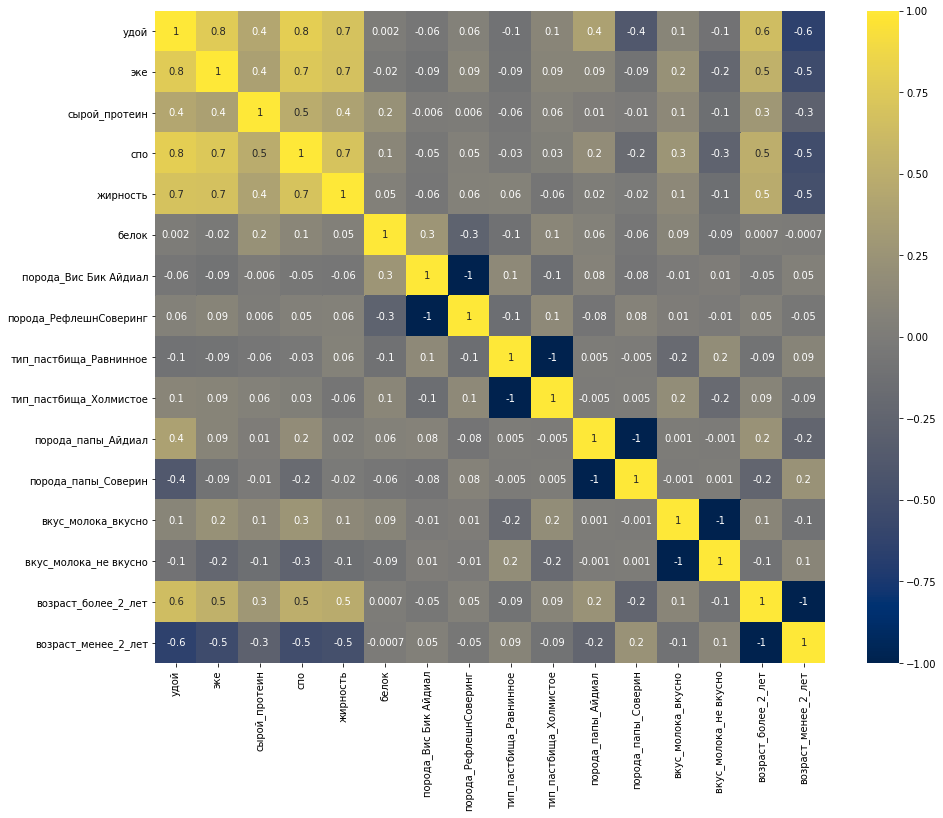

In [46]:
# построим матрицу корреляции
ferma_for_matrix = pd.get_dummies(ferma_main) # чтобы избежать проблемы мультиколлинеарности
plt.figure(figsize = (15, 12))
sns.heatmap(ferma_for_matrix.drop('id', axis = 1).corr(method='spearman'), annot = True, cmap = 'cividis', fmt='.1g')

*Если обобщать вывод, то в основном удой и жирность молока зависит от добавок в корм коровы, а так же от ее возраста, в конце корреляционного анализа будет дан полный вывод*

### 4.2 Постройте диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков.

### Категориальный признак: порода

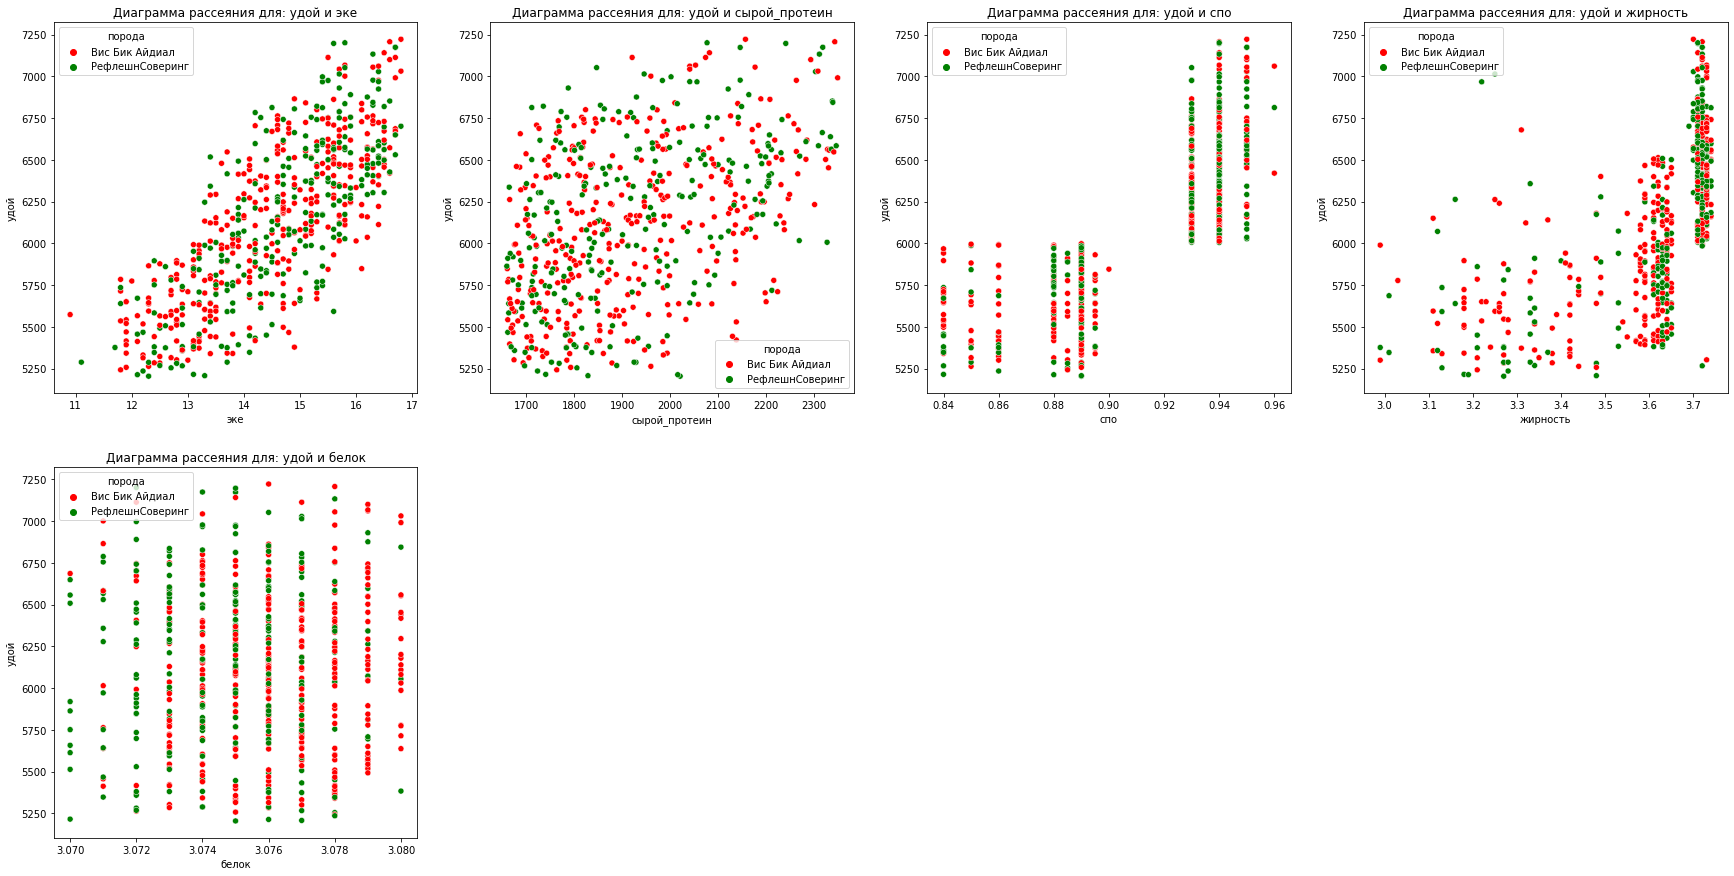

In [47]:
# список количественных признаков
ferma_arr = ['эке', 'сырой_протеин', 'спо', 'жирность', 'белок']

plt.figure(figsize = (30, 15))
for i, j in enumerate(ferma_arr, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(data = ferma_main, x = j, y = 'удой', hue = 'порода', palette = ['red', 'green'])
    plt.title(f'Диаграмма рассеяния для: удой и {j}')
    

### Категориальный признак: тип пастбища

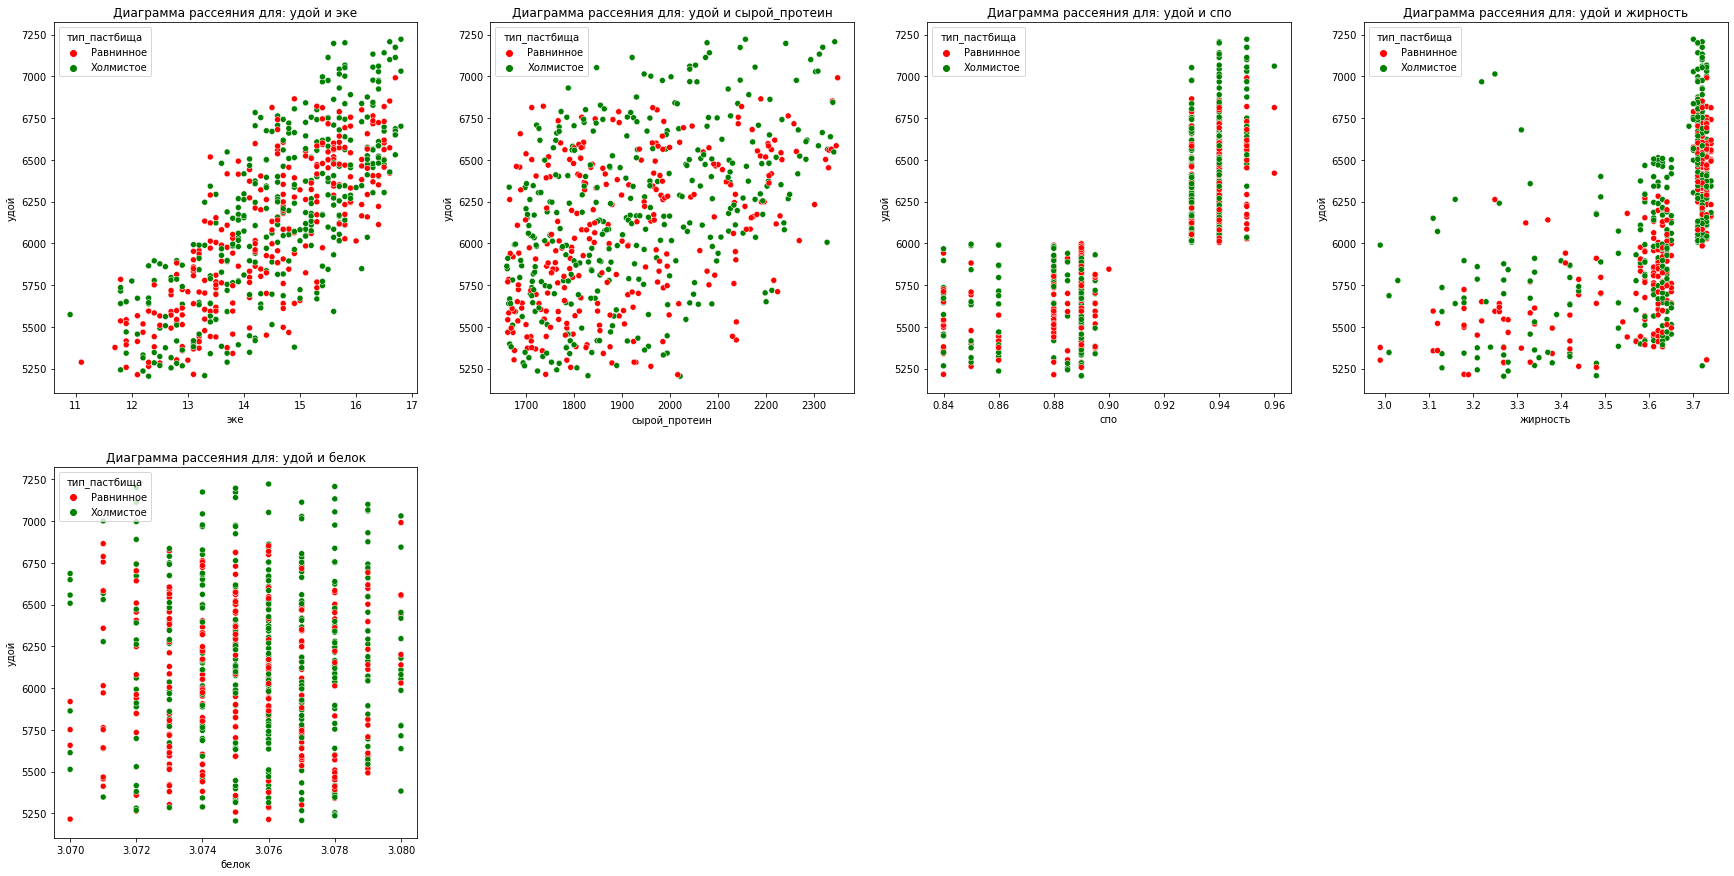

In [48]:
plt.figure(figsize = (30, 15))
for i, j in enumerate(ferma_arr, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(data = ferma_main, x = j, y = 'удой', hue = 'тип_пастбища', palette = ['red', 'green'])
    plt.title(f'Диаграмма рассеяния для: удой и {j}')

### Категориальный признак: порода папы

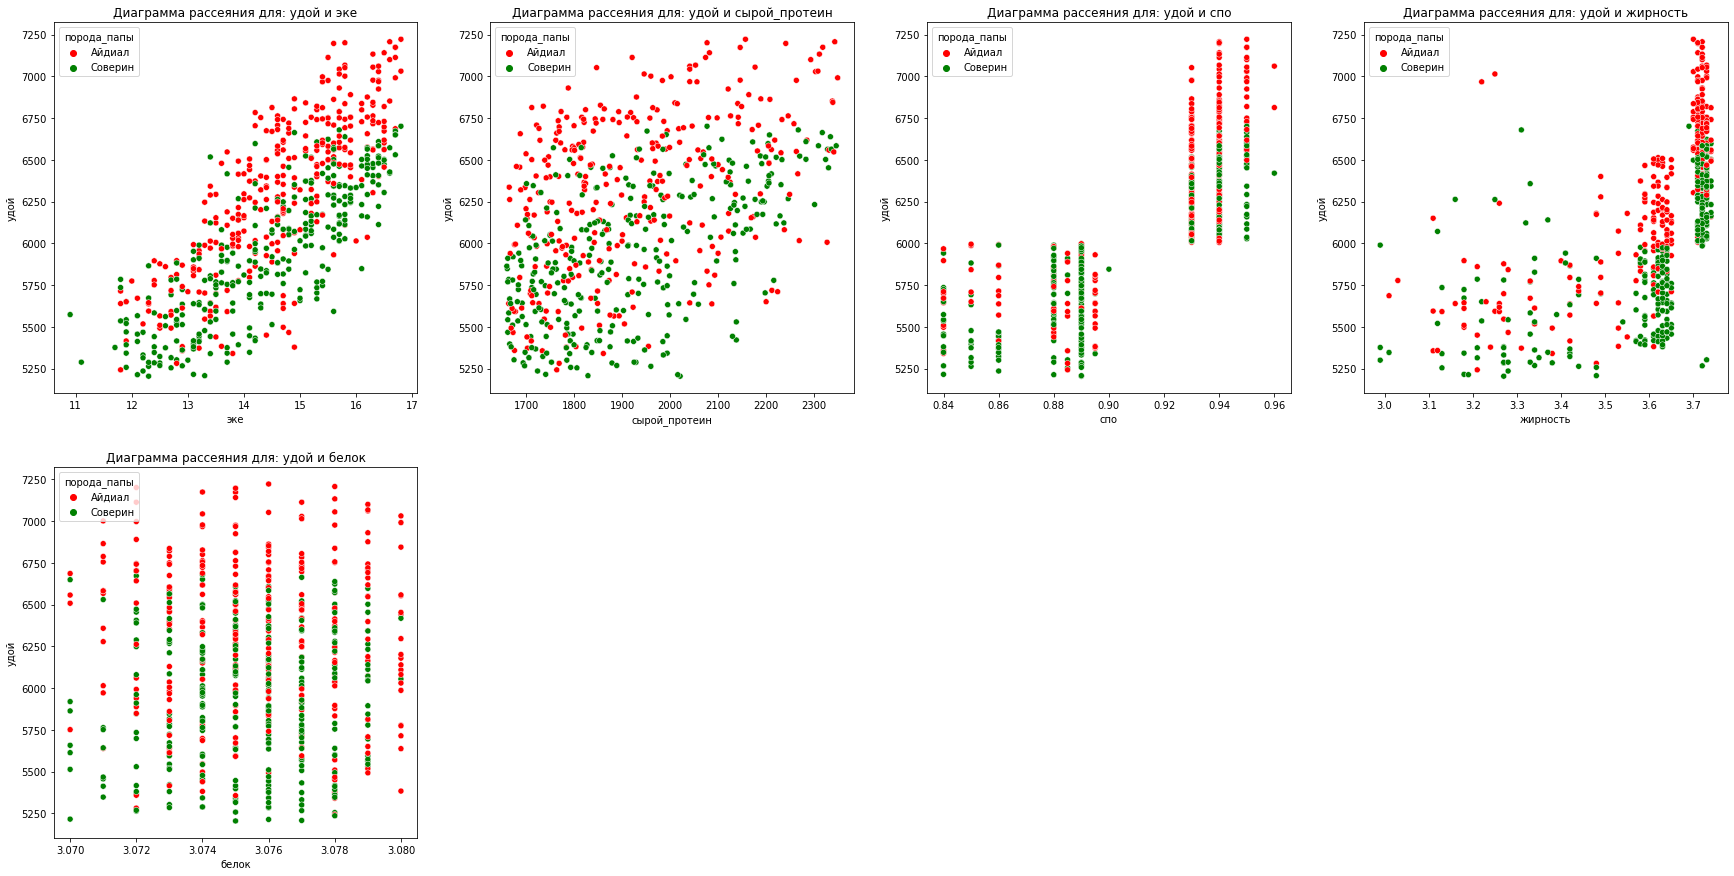

In [49]:
plt.figure(figsize = (30, 15))
for i, j in enumerate(ferma_arr, 1):  
    plt.subplot(2, 4, i)
    sns.scatterplot(data = ferma_main, x = j, y = 'удой', hue = 'порода_папы', palette = ['red', 'green'])
    plt.title(f'Диаграмма рассеяния для: удой и {j}')

### Категориальный признак: вкус молока

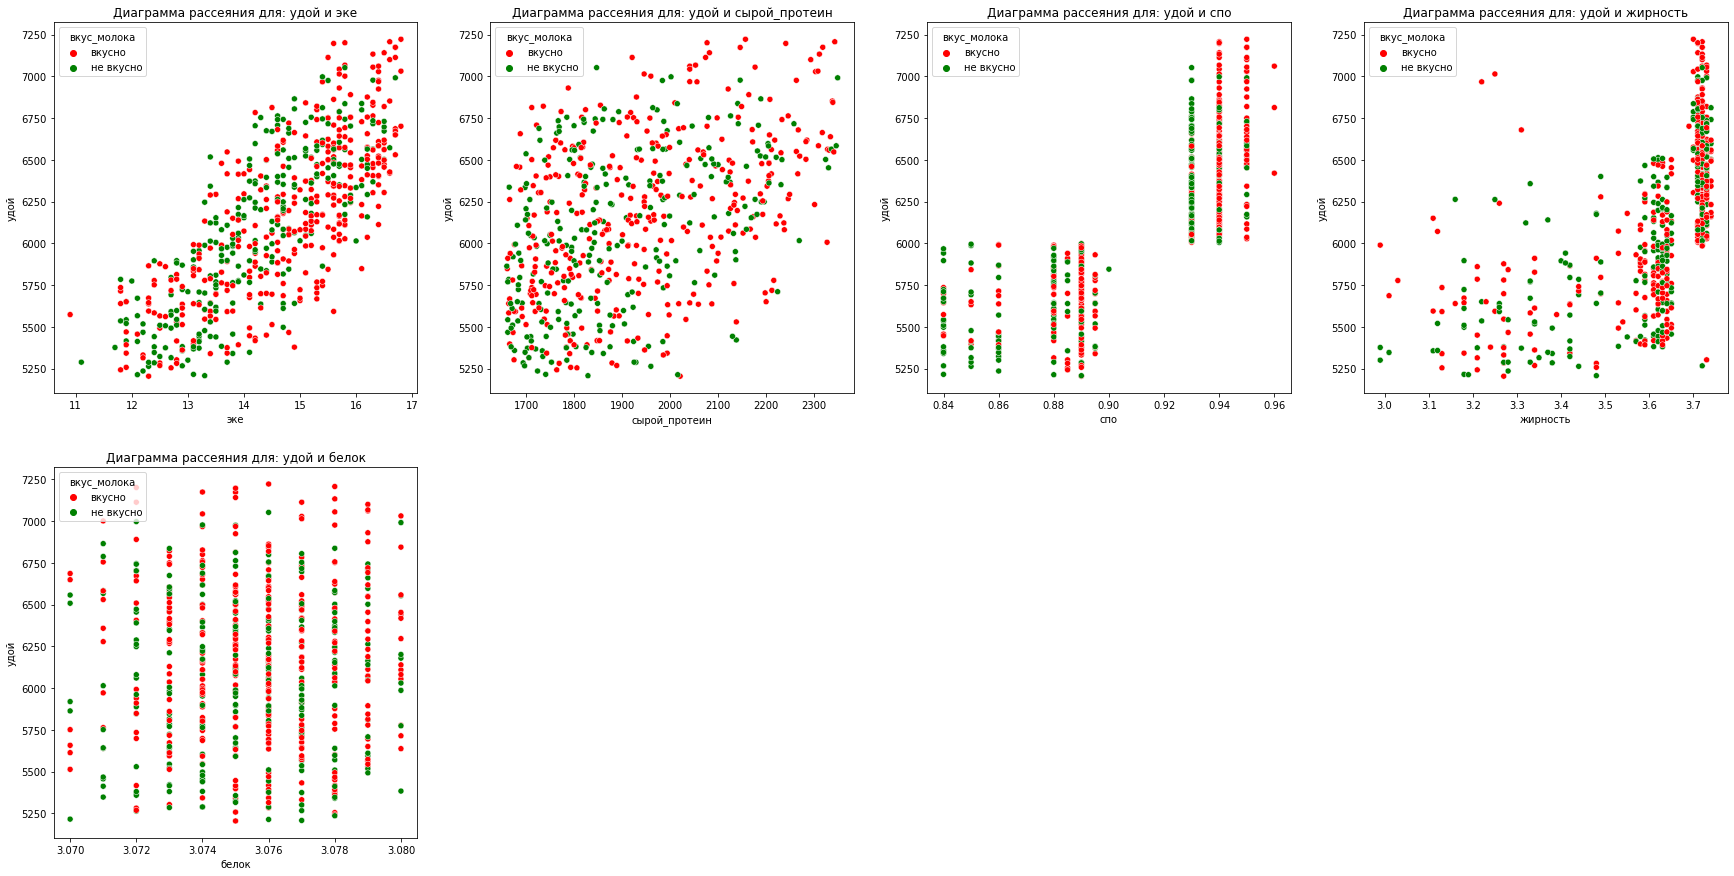

In [50]:
plt.figure(figsize = (30, 15))
for i, j in enumerate(ferma_arr, 1):  
    plt.subplot(2, 4, i)
    sns.scatterplot(data = ferma_main, x = j, y = 'удой', hue = 'вкус_молока', palette = ['red', 'green'])
    plt.title(f'Диаграмма рассеяния для: удой и {j}')

### Категориальный признак: возраст

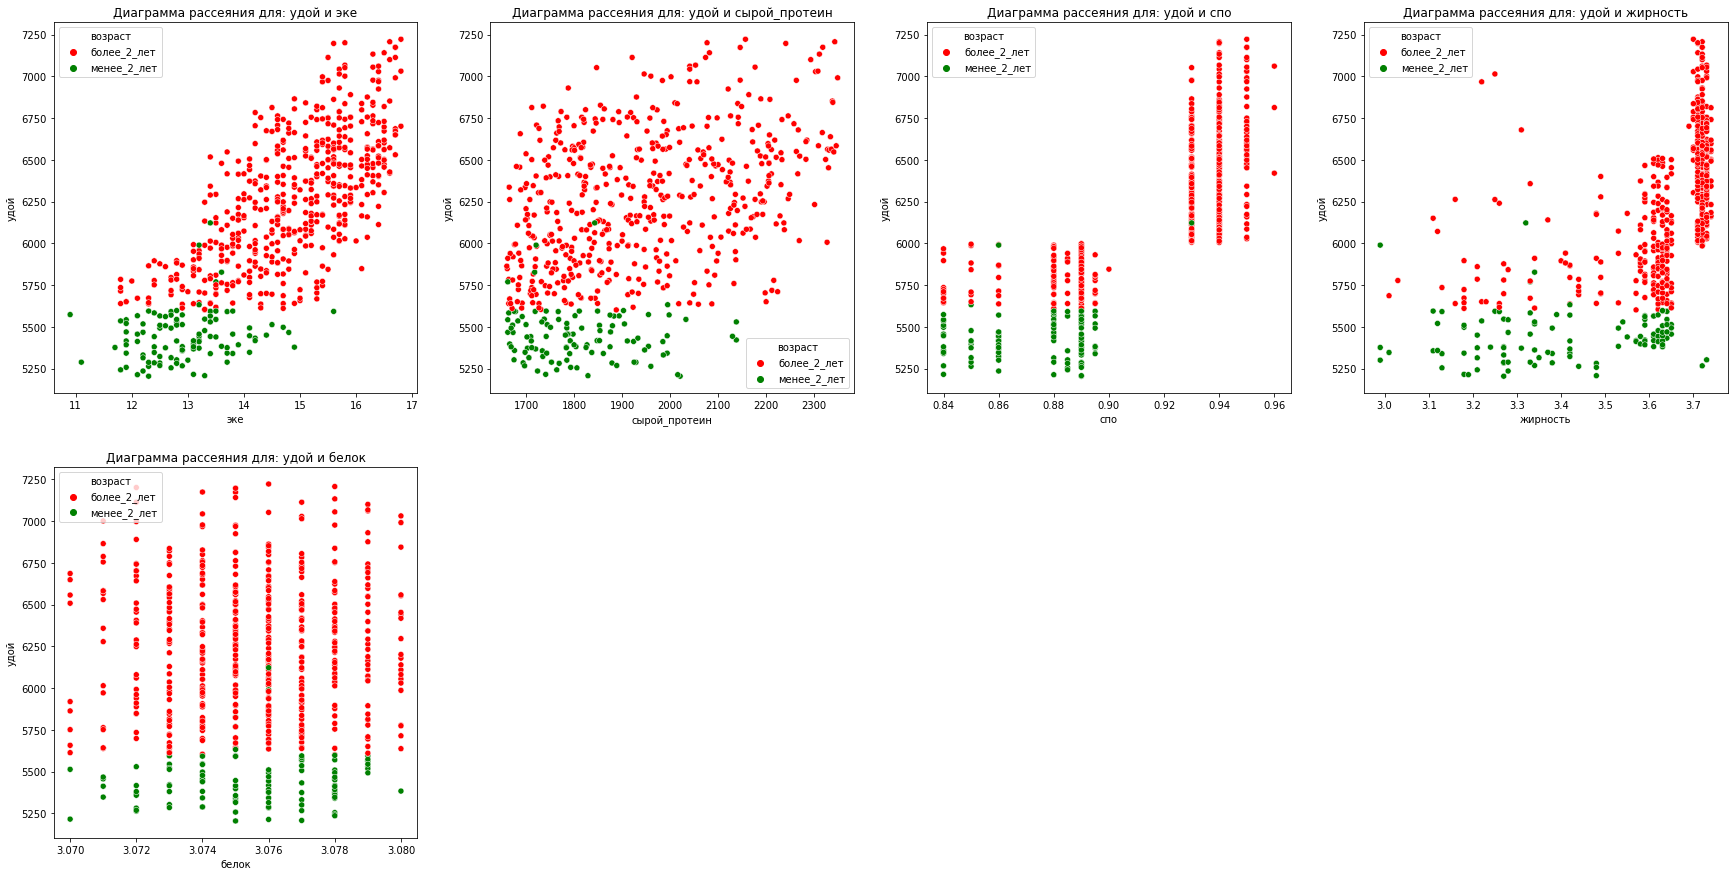

In [51]:
plt.figure(figsize = (30, 15))
for i, j in enumerate(ferma_arr, 1):  
    plt.subplot(2, 4, i)
    sns.scatterplot(data = ferma_main, x = j, y = 'удой', hue = 'возраст', palette = ['red', 'green'])
    plt.title(f'Диаграмма рассеяния для: удой и {j}')

**Вывод по корреляционному анализу, исходя из матрицы корреляций и диаграммы рассеяния (Сравнение признака удой со всеми остальными):**
- **эке** - сильная линейная зависимость. В матрице корреляции имеет значение 0.8
- **сырой протеин** - зависимость неясна из-за большого разброса значений. В матрице корреляции имеет значение 0.4
- **спо** - сильная зависимость, но она не линейная. В матрице корреляции имеет значение 0.8
- **жирность** - видна сильная зависимость в диапазоне от 3.6 до 3.7. В матрице корреляции имеет значение 0.6
- **белок** - связь не линейная, зависимости практически нет. В матрице корреляции имеет значение 0.02
- **порода, порода папы, вкус молока** - слабая зависимость. В матрице корреляции имеют значения от 0.06 до 0.1
- **возраст** - наблюдается очень сильная зависимость. В матрице корреляции имеет значение 0.7

Так же хочется отметить последнюю диаграмму рассеяния: там отчетливо видно, что коровам, возраст которых превышает 2 года необходимо большее количество добавок, а они взамен дают больше удоя


## Обучение модели линейной регрессии

**5.1 Подготовьте данные датасета ferma_main.csv и обучите на них первую модель LinearRegression.**
- Используйте в качестве целевого признак Удой, кг.
- Отберите признаки, которые подходят для модели линейной регрессии, аргументируйте выбор. Опирайтесь не только на наличие или отсутствие линейной связи между признаками, но и на причинно-следственные связи между удоем коров и группами признаков из описания датасета.
- Разбейте данные на тренировочную и тестовую выборки.
- Кодируйте категориальные признаки с помощью OneHotEncoder.
- Масштабируйте количественные признаки с помощью StandardScaler.
- Обучите модель линейной регрессии на подготовленных данных.
- Оцените качество модели на тестовой выборке: рассчитайте R², проанализируйте остатки с помощью графиков.
- Оформите выводы, укажите:
    - значение R² модели;
    - какие выводы следуют из анализа остатков;
    - нужны ли дополнительные исследования.


*Для начала удалим признаки, которые не подойдут для модели линейной регрессии*

In [52]:
ferma_lr = ferma_main.drop(['id', 'белок', 'жирность', 'вкус_молока'], axis = 1) 
# удалил именно эти признаки, так как id совершенно ненужная нумерация, с белком практически нет никакой зависимости,
# а жирность, так как он связан только с молоком

# проверка оставшихся столбцов
display(ferma_lr.head())

,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,возраст
0,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет
1,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет
2,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,более_2_лет
3,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет
4,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет


*Разбиваем данные на тестовую и тренировочную выборки*

In [53]:
RANDOM_STATE = 42
X = ferma_lr.drop('удой', axis = 1)
y = ferma_lr['удой']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)


*Кодируем категориальные признаки с помощью OneHotEncoder*

In [54]:
num_columns = ['эке', 'спо', 'сырой_протеин']
word_columns = ['порода', 'тип_пастбища', 'порода_папы', 'возраст']

encoder = OneHotEncoder(drop = 'first', sparse = False)
X_train_ohe = encoder.fit_transform(X_train[word_columns])
X_test_ohe = encoder.fit_transform(X_test[word_columns])
encoder_word_columns = encoder.get_feature_names()

*Масштабируем количественные признаки с помощью StandardScaler*

In [55]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train[num_columns])
X_test_scaler = scaler.fit_transform(X_test[num_columns])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_word_columns)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_word_columns)

X_train_scaler = pd.DataFrame(X_train_scaler, columns=num_columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=num_columns)

X_train = pd.concat([X_train_ohe, X_train_scaler], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaler], axis=1)

*Обучим модель линейной регрессии на подготовленных данных*

In [56]:
ferma_lr_1 = LinearRegression()
ferma_lr_1.fit(X_train, y_train)
predictions = ferma_lr_1.predict(X_test)

# сразу рассчитаем все метрики, которые понадобятся дальше
mse_1 = mean_squared_error(y_test, predictions)
mae_1 = mean_absolute_error(y_test, predictions)
rmse_1 = mean_squared_error(y_test, predictions, squared = False)

*Оценим качество модели на тестовой выборке: рассчитаем R²*

In [57]:
r2_1 = r2_score(y_test, predictions)
print(f'r2 для первой модели равно {r2_1}')

r2 для первой модели равно 0.7955366875712282


*проанализируем остатки с помощью графиков*

Text(0.5, 1.0, 'Анализ дисперсии')

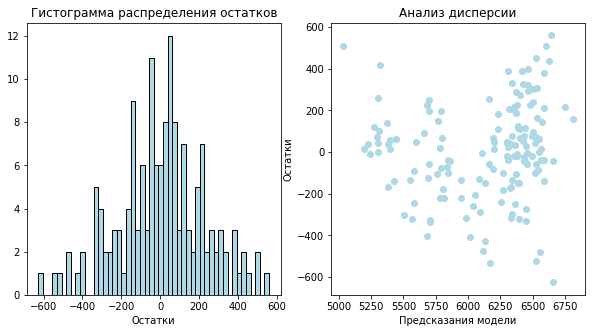

In [58]:
residuals_1 = y_test - predictions 

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
axes[0].hist(residuals_1, bins = 50, color = 'lightblue', edgecolor = 'black')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals_1, color = 'lightblue')
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
                         

**Вывод по первой модели:**
- значение r2 модели очень хорошее - 0.8
- из анализа остатков видно, что они распределены нормально, график почти полностью симметричен
- на анализа дисперсии видно, что модель плохо предсказывает значения в интервале от 5780 до 6250. Из этого следует, что стоит добавить информацию по коровам в этом диапазоне

**5.2 Подготовьте данные с учётом связи входных признаков с целевым и обучите на них вторую модель LinearRegression.**
- Посмотрите на диаграммы рассеяния: на них можно увидеть, что некоторые входные признаки связаны с целевым нелинейно. Исключите нелинейность, чтобы эти признаки были информативны для линейной регрессии. Вот несколько способов, которыми это можно сделать:
    - Вы обнаружите, что СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуйте СПО в категориальный бинарный признак, использовав эту границу.
    - Вы обнаружите, что ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.
- Повторите шаги из пункта 1 и создайте вторую модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.


In [59]:
ferma_lr_2 = ferma_main.copy(deep = True)

# Преобразуем спо в бинарный признак
print(ferma_lr_2['спо'].mean()) # это значение и будет границей
ferma_lr_2['спо_бинарный'] = ferma_lr_2['спо'].apply(lambda x: 1 if x > 0.91 else 0)

# Преобразуем эке
ferma_lr_2['эке^2'] = ferma_lr_2['эке'] ** 2

# Удалим ненужные столбцы
ferma_lr_2 = ferma_lr_2.drop(['спо', 'эке', 'id', 'жирность', 'белок', 'вкус_молока'], axis = 1)

display(ferma_lr_2.head())

0.913218954248366


,удой,сырой_протеин,порода,тип_пастбища,порода_папы,возраст,спо_бинарный,эке^2
0,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,0,201.64
1,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,0,163.84
2,5810,1854,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,0,196.00
3,5895,2012,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,0,153.76
4,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,0,163.84


*Теперь повторяем все те же шаги*

In [60]:
# разбиваем на тестовую и тренировочную выборки
X = ferma_lr_2.drop('удой', axis = 1)
y = ferma_lr_2['удой']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

In [61]:
# применяем OHE
word_columns = ['порода', 'тип_пастбища', 'порода_папы', 'возраст']
num_columns = ['эке^2', 'спо_бинарный', 'сырой_протеин']

encoder = OneHotEncoder(drop = 'first', sparse = False)
X_train_ohe = encoder.fit_transform(X_train[word_columns])
X_test_ohe = encoder.fit_transform(X_test[word_columns])
encoder_word_columns = encoder.get_feature_names()

# применяем StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train[num_columns])
X_test_scaler = scaler.fit_transform(X_test[num_columns])


X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_word_columns)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_word_columns)

X_train_scaler = pd.DataFrame(X_train_scaler, columns=num_columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=num_columns)

X_train = pd.concat([X_train_ohe, X_train_scaler], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaler], axis=1)

In [62]:
# обучаем модель
ferma_education_2 = LinearRegression()
ferma_education_2.fit(X_train, y_train)
predictions = ferma_education_2.predict(X_test)

# сразу рассчитаем все метрики, которые понадобятся дальше
mse_2 = mean_squared_error(y_test, predictions)
mae_2 = mean_absolute_error(y_test, predictions)
rmse_2 = mean_squared_error(y_test, predictions, squared = False)

In [63]:
# оцениваем качество модели
r2_2 = r2_score(y_test, predictions)
print(f'r2 для второй модели составляет {r2_2}')

r2 для второй модели составляет 0.8321139871459036


Text(0.5, 1.0, 'Анализ дисперсии')

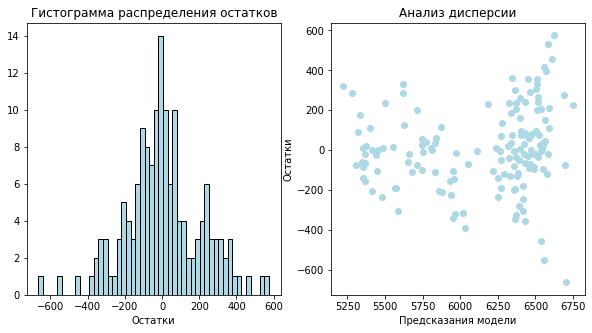

In [64]:
# проанализируем остатки с помощью графиков
residuals_2 = y_test - predictions 

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
axes[0].hist(residuals_2, bins = 50, color = 'lightblue', edgecolor = 'black')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals_2, color = 'lightblue')
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')

**Вывод по второй модели:**
- значение r2 по сравнению с первой моделью увеличилось - 0.83
- график распределения остатков - нормальный, симметричный
- все те же замечания по добавлению информации, что и в первой модели

**5.3 Добавьте в данные новый признак и обучите на них третью модель LinearRegression.**
- Добавьте признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.
- Устраните нелинейность между признаками.
- Повторите шаги из пункта 1 и создайте третью модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы

In [65]:
ferma_general = ferma_main.merge(ferma_dad, on = 'id')

# избавимся от нелинейности
ferma_general['спо_бинарный'] = ferma_general['спо'].apply(lambda x: 1 if x > 0.91 else 0)

ferma_general['эке^2'] = ferma_general['эке'] ** 2

# уберем лишние столбцы
ferma_general = ferma_general.drop(['id', 'белок', 'жирность', 'эке', 'спо', 'вкус_молока'], axis = 1)

# проверим
display(ferma_general.head())

,удой,сырой_протеин,порода,тип_пастбища,порода_папы,возраст,имя_папы,спо_бинарный,эке^2
0,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,Буйный,0,201.64
1,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,Соловчик,0,163.84
2,5810,1854,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,Барин,0,196.00
3,5895,2012,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,Буйный,0,153.76
4,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,Барин,0,163.84


*Повторим все те же действия*

In [66]:
X = ferma_general.drop('удой', axis = 1)
y = ferma_general['удой']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)



In [67]:
# объединим тестовую и тренировочную выборки для будущей модели
X_train_general = pd.concat([X_train, X_test], ignore_index = True)
y_train_general = pd.concat([y_train, y_test], ignore_index = True)

In [68]:
word_columns = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'имя_папы']
num_columns = ['эке^2', 'спо_бинарный', 'сырой_протеин']

encoder = OneHotEncoder(drop = 'first', sparse = False)
X_train_ohe = encoder.fit_transform(X_train[word_columns])
X_test_ohe = encoder.fit_transform(X_test[word_columns])
encoder_word_columns = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train[num_columns])
X_test_scaler = scaler.fit_transform(X_test[num_columns])


X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_word_columns)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_word_columns)

X_train_scaler = pd.DataFrame(X_train_scaler, columns=num_columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=num_columns)

X_train = pd.concat([X_train_ohe, X_train_scaler], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaler], axis=1)

In [69]:
ferma_educations_general = LinearRegression()
ferma_educations_general.fit(X_train, y_train)
predictions = ferma_educations_general.predict(X_test)

# сразу рассчитаем все метрики, которые понадобятся дальше
mse_3 = mean_squared_error(y_test, predictions)
mae_3 = mean_absolute_error(y_test, predictions)
rmse_3 = mean_squared_error(y_test, predictions, squared = False)

In [70]:
r2_3 = r2_score(y_test, predictions)
print(f'r2 для третьей модели составляет {r2_3}')

r2 для третьей модели составляет 0.8457252039457139


Text(0.5, 1.0, 'Анализ дисперсии')

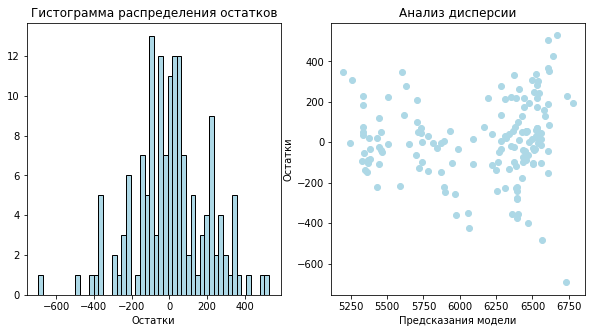

In [71]:
residuals_3 = y_test - predictions 

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
axes[0].hist(residuals_3, bins = 50, color = 'lightblue', edgecolor = 'black')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals_3, color = 'lightblue')
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')

**Вывод по третьей модели:**
- значение r2 по сравнению со второй моделью увеличилось - 0.85
- график распределения остатков - нормальный, симметричный
- все те же замечания по добавлению информации, что и в первой модели

**5.4 Сравните качество трёх моделей линейной регрессии, сопоставьте их R² и остатки**

In [72]:
# вывод r2 моделей и сравнение
print(f'r2 первой модели равно {r2_1}')
print(f'r2 второй модели равно {r2_2}')
print(f'r2 третьей модели равно {r2_3}')
print(f'наилучшее показание r2 у третьей модели с показателем {r2_3}')

print('')
# вывод остатков моделей и сравнение
print(f'среднее значение остатков первой модели равно {residuals_1.mean()}')
print(f'среднее значение остатков второй модели равно {residuals_2.mean()}')
print(f'среднее значение остатков третьей модели равно {residuals_3.mean()}')
print(f'наилучшее показание среднего значения остатков у второй модели с показателем {residuals_2.mean()}')

r2 первой модели равно 0.7955366875712282
r2 второй модели равно 0.8321139871459036
r2 третьей модели равно 0.8457252039457139
наилучшее показание r2 у третьей модели с показателем 0.8457252039457139

среднее значение остатков первой модели равно 4.165742222147582
среднее значение остатков второй модели равно 5.328181310479647
среднее значение остатков третьей модели равно 8.969807682590584
наилучшее показание среднего значения остатков у второй модели с показателем 5.328181310479647


**5.5 Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE. Используйте функции для расчёта метрик.**
- Выберите лучшую модель;
- Укажите доверительный интервал прогноза лучшей модели. Для этого рассчитайте квантили ошибки модели на тренировочных данных

In [73]:
# рассчет mse для 3 - х моделей
print(f'mse первой модели равно {mse_1}')
print(f'mse второй модели равно {mse_2}')
print(f'mse третьей модели равно {mse_3}')
print(f'наилучшее показание mse у третьей модели с показателем {mse_3}')


mse первой модели равно 50661.70874038784
mse второй модели равно 41598.62316503475
mse третьей модели равно 38226.04990031033
наилучшее показание mse у третьей модели с показателем 38226.04990031033


In [74]:
# рассчет mae для 3 - х моделей
print(f'mae первой модели равно {mae_1}')
print(f'mae второй модели равно {mae_2}')
print(f'mae третьей модели равно {mae_3}')
print(f'наилучшее показание mae у третьей модели с показателем {mae_3}')

mae первой модели равно 174.29795962387325
mae второй модели равно 152.91527281500572
mae третьей модели равно 146.69246276163457
наилучшее показание mae у третьей модели с показателем 146.69246276163457


In [75]:
# рассчет rmse для 3 - х моделей
print(f'rmse первой модели равно {rmse_1}')
print(f'rmse второй модели равно {rmse_2}')
print(f'rmse третьей модели равно {rmse_3}')
print(f'наилучшее показание rmse у третьей модели с показателем {rmse_3}')

rmse первой модели равно 225.0815601962716
rmse второй модели равно 203.95740527138196
rmse третьей модели равно 195.5148329419288
наилучшее показание rmse у третьей модели с показателем 195.5148329419288


In [76]:
# доверительный интервал должен быть в интервале от 95% до 99%, так что возьмем среднее - 97%
print(f'доверительный интерал 97% равен {st.norm.interval(confidence = 0.97, loc = np.mean(predictions), scale = st.sem(predictions))}')

доверительный интерал 97% равен (6052.100596588737, 6208.731029876147)


*Получается, что, опираясь на рассчитанные метрики, **лучшая модель - третья**.*
- mse = **37926.164902385564**
- mae = **146.277948445641**
- rmse = **194.74641178308156**
- доверительный интерал 97% лучшей модели равен (**6054.753944194411, 6211.74209937218**)

**5.6 С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.**
- Добавьте недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмите из датасета ferma_main.csv средние значения каждого из признаков и увеличьте их на 5%.
- Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
- Получите прогноз удоя коров.


In [77]:
cow_buy_lr = cow_buy.copy(deep = True)

# возьмем из датасета ferma_main.csv средние значения каждого из признаков и увеличим их на 5%
ferma_mean = ferma_main[['эке', 'сырой_протеин', 'спо']].mean()
ferma_after = ferma_mean * 1.05 

# добавим эти признаки
cow_buy_lr['эке'] = ferma_after['эке']
cow_buy_lr['эке^2'] = cow_buy_lr['эке'] ** 2

cow_buy_lr['сырой_протеин'] = ferma_after['сырой_протеин']

cow_buy_lr['спо'] = ferma_after['спо']
cow_buy_lr['спо_бинарный'] = cow_buy_lr['спо'].apply(lambda x: 1 if x > 0.91 else 0)

# удалим ненужные столбцы
cow_buy_lr = cow_buy_lr.drop(['спо', 'эке', 'текущий_белок'], axis = 1)
#X_train_general = X_train_general.drop('вкус_молока', axis=1) # и так же удалим этот столбец

In [78]:
print(X_train_general.shape)
print(cow_buy_lr.shape)
display(X_train_general.head())
display(cow_buy_lr.head())

(612, 8)
(20, 9)


,сырой_протеин,порода,тип_пастбища,порода_папы,возраст,имя_папы,спо_бинарный,эке^2
0,1984,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,Буйный,1,198.81
1,1984,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,Буйный,1,246.49
2,2067,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,Буйный,1,249.64
3,2091,Вис Бик Айдиал,Равнинное,Соверин,более_2_лет,Соловчик,1,243.36
4,1721,РефлешнСоверинг,Равнинное,Соверин,более_2_лет,Барин,0,182.25


,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,возраст,эке^2,сырой_протеин,спо_бинарный
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,более_2_лет,233.208082,2018.417402,1
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,менее_2_лет,233.208082,2018.417402,1
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,более_2_лет,233.208082,2018.417402,1
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,более_2_лет,233.208082,2018.417402,1
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,более_2_лет,233.208082,2018.417402,1


*все так же проводим аналогичные действия*


In [79]:
X_test_ohe = encoder.transform(cow_buy_lr[word_columns])
encoder_word_columns = encoder.get_feature_names()  

X_test_scaler = scaler.transform(cow_buy_lr[num_columns])

# Создание DataFrame для преобразованных данных
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_word_columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=num_columns)

# Объединение преобразованных данных
X_test_general = pd.concat([X_test_ohe, X_test_scaler], axis=1)



# Предсказание с использованием уже обученной модели
predictions = ferma_educations_general.predict(X_test_general)  # получим прогноз удоя коров

# Запись прогнозов в DataFrame
cow_buy['прогноз_удоя'] = predictions

# Отображение результата
display(cow_buy)







,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,текущий_белок,возраст,прогноз_удоя
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6576.161541
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6312.136409
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6278.855400
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6588.259788
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6530.021415
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6349.370004
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6576.161541
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6536.913140
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6278.855400
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6363.483057


**Вывод по задаче регрессии:**
- рассчитали лучшую модель, с помощью показателей метрик
- Получили нужное предсказание модели, протестировав ее на тестовой выборке
- прогноз удоя по всем коровам показал отличный результат (каждая корова даст больше 6000 кг молока)

## Обучение модели логистической регрессии

**6.1 Подготовьте данные датасета ferma_main.csv и обучите на них модель LogisticRegression.**
- Используйте в качестве целевого признак Вкус молока.
- При необходимости преобразуйте имеющиеся или добавьте новые признаки.
- Разбейте данные на тренировочную и тестовую выборки.
- Кодируйте категориальные признаки с помощью OneHotEncoder.
- Масштабируйте количественные признаки с помощью StandardScaler.
- Обучите модель логистической регрессии на подготовленных данных.
- Оцените качество модели на тестовой выборке: рассчитайте метрики accuracy, recall, precision.
- Постройте матрицу ошибок

In [80]:
ferma_log_reg = ferma_main.copy(deep = True)
# преобразуем вкус молока и спо в бинарный 
ferma_log_reg['вкус_молока_бинарный'] = ferma_log_reg['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)
ferma_log_reg['спо_бинарный'] = ferma_log_reg['спо'].apply(lambda x: 1 if x > 0.91 else 0)

ferma_log_reg['эке^2'] = ferma_log_reg['эке'] ** 2

ferma_log_reg = ferma_log_reg.drop(['спо', 'эке', 'вкус_молока', 'удой', 'id'], axis = 1)

In [81]:
X = ferma_log_reg.drop('вкус_молока_бинарный', axis = 1)
y = ferma_log_reg['вкус_молока_бинарный']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

In [82]:
X_train_general = pd.concat([X_train, X_test], ignore_index = True)
y_train_general = pd.concat([y_train, y_test], ignore_index = True)

In [83]:
word_columns = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо_бинарный']
num_columns = ['жирность', 'белок', 'эке^2', 'сырой_протеин']

encoder = OneHotEncoder(drop = 'first', sparse = False)
X_train_ohe = encoder.fit_transform(X_train[word_columns])
X_test_ohe = encoder.transform(X_test[word_columns])
encoder_word_columns = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train[num_columns])
X_test_scaler = scaler.transform(X_test[num_columns])

X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_word_columns)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_word_columns)

X_train_scaler = pd.DataFrame(X_train_scaler, columns = num_columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = num_columns)

X_train = pd.concat([X_train_ohe, X_train_scaler], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaler], axis=1)

In [84]:
educ = LogisticRegression(random_state = RANDOM_STATE, solver='liblinear', penalty='l1')
educ.fit(X_train, y_train)
y_pred = educ.predict(X_test)

In [85]:
educ_accuracy = accuracy_score(y_pred, y_test)
educ_recall = recall_score(y_pred, y_test)
educ_precision = precision_score(y_pred, y_test)

print(f'accuracy = {educ_accuracy}')
print(f'recall = {educ_recall}')
print(f'precision = {educ_precision}')

accuracy = 0.5751633986928104
recall = 0.5423728813559322
precision = 0.8533333333333334


Text(0.5, 15.0, 'predict')

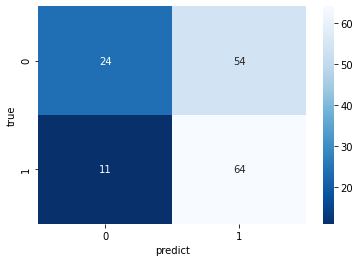

In [86]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot = True, fmt = 'd', cmap = 'Blues_r')
plt.ylabel('true')
plt.xlabel('predict')

- precission имеет довольно хорошие показатели - 0.8533333333333334, но у метрик accuracy - 0.5751633986928104 и recall - 0.5423728813559322 с показателями дела обстаят хуже.
- получили 54 ошибки первого рода, 64 - вернопредсказанны. Соотношение почти 1:1


**Проанализируйте модель логистической регрессии.**
- Объясните, какая ошибка критичнее всего при покупке коров: первого или второго рода. Помните, что главное для заказчика — вкусное молоко. Сформулируйте ответ с учётом метрик recall и precision, выберите более важную из них.
- Сведите критичную ошибку к нулю: для этого измените порог принадлежности к классам. Ещё раз рассчитайте значения метрик recall и precision. Какое значение порога вы выбрали? Как изменились значения метрик?
- Оформите выводы: скажите, что нужно сделать дальше, исходя из анализа модели?

*Критичней всего будет **ошибка первого рода**, так как в такой ситуации мы можем порекомендовать фермеру коров с невкусным молоком. В метрике **recall** задействованы ошибки второго рода, для нас это не критично. В метрике **precision** задействованы ошибки первого рода, для нас это как раз таки и важно. Поэтому выбираем эту метрику как более важную*

In [87]:
# подберем порог
y_proba = educ.predict_proba(X_test)[:, 1]
data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_test', 'y_proba']).sort_values(by='y_proba',ascending=False)

display(data.head()) 

,y_test,y_proba
115,1,0.870181
64,1,0.851161
112,1,0.847171
93,1,0.843748
46,1,0.837862


In [88]:
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 10,endpoint=False)]
columns = []


for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)


display(data.sample(5))

,y_test,y_proba,y_pred_0.1,y_pred_0.19,y_pred_0.28,y_pred_0.37,y_pred_0.46,y_pred_0.55,y_pred_0.64,y_pred_0.73,y_pred_0.82,y_pred_0.91
12,1,0.714610,1,1,1,1,1,1,1,0,0,0
132,0,0.472651,1,1,1,1,1,0,0,0,0,0
92,0,0.602039,1,1,1,1,1,1,0,0,0,0
54,1,0.769861,1,1,1,1,1,1,1,1,0,0
58,1,0.514890,1,1,1,1,1,0,0,0,0,0


In [89]:
def choice_threshold(threshold_arr, proba):
    sp = pd.DataFrame(columns=['порог', 'precision', 'recall', 'количество_FP', 'число_предсказанных_объектов', 'всего_объектов_класса_1'])

    for i in threshold_arr:
        column = 'y_pred_' + str(i)

        # Precision
        precision = proba.loc[proba[column] == 1, 'y_test'].mean()

        # Число предсказанных объектов
        pred = proba[column].sum()

        # Всего объектов класса 1
        class_1 = proba['y_test'].sum()

        # Recall
        recall = proba.loc[(proba[column] == 1) & (proba['y_test'] == 1)].shape[
                     0] / class_1

        # Количество ложноположительных предсказаний (FP)
        false_positives = proba.loc[(proba[column] == 1) & (proba['y_test'] == 0)].shape[0]

        # Добавляем результаты в датафрейм
        sp = sp.append({
            'порог': i,
            'precision': precision,
            'recall': recall,
            'количество_FP': false_positives,
            'число_предсказанных_объектов': pred,
            'всего_объектов_класса_1': class_1,
        }, ignore_index=True)

    return sp


In [90]:
choice_threshold(thresholds, data)

,порог,precision,recall,количество_FP,число_предсказанных_объектов,всего_объектов_класса_1
0,0.10,0.490196,1.000000,78.0,153.0,75.0
1,0.19,0.490196,1.000000,78.0,153.0,75.0
2,0.28,0.493421,1.000000,77.0,152.0,75.0
3,0.37,0.517483,0.986667,69.0,143.0,75.0
4,0.46,0.533835,0.946667,62.0,133.0,75.0
5,0.55,0.547170,0.773333,48.0,106.0,75.0
6,0.64,0.655172,0.506667,20.0,58.0,75.0
7,0.73,0.800000,0.320000,6.0,30.0,75.0
8,0.82,1.000000,0.080000,0.0,6.0,75.0
9,0.91,NaN,0.000000,0.0,0.0,75.0


*Порог ниже 0.64 дает нам большое количество FP, но выше, начиная с отметки 0.73 - маленькое количество FP*

In [91]:
# проанализируем детальнее
thresholds_interval = [round(i,2) for i in np.linspace(0.64,0.9,num = 11,endpoint=False)]
data_2 = data.copy(deep=True)

for i in thresholds_interval:
    columns.append('y_pred_'+str(i))
    data_2['y_pred_'+str(i)] = data_2['y_proba'].apply(lambda x: 1 if x >= i else 0)

display(data_2.sample(5))

choice_threshold(thresholds_interval, data_2)

,y_test,y_proba,y_pred_0.1,y_pred_0.19,y_pred_0.28,y_pred_0.37,y_pred_0.46,y_pred_0.55,y_pred_0.64,y_pred_0.73,...,y_pred_0.91,y_pred_0.66,y_pred_0.69,y_pred_0.71,y_pred_0.76,y_pred_0.78,y_pred_0.81,y_pred_0.83,y_pred_0.85,y_pred_0.88
90,1,0.613591,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.543016,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,0.620310,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0.609648,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
54,1,0.769861,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,0,0,0,0


,порог,precision,recall,количество_FP,число_предсказанных_объектов,всего_объектов_класса_1
0,0.64,0.655172,0.506667,20.0,58.0,75.0
1,0.66,0.660000,0.440000,17.0,50.0,75.0
2,0.69,0.769231,0.400000,9.0,39.0,75.0
3,0.71,0.794118,0.360000,7.0,34.0,75.0
4,0.73,0.800000,0.320000,6.0,30.0,75.0
5,0.76,0.842105,0.213333,3.0,19.0,75.0
6,0.78,0.928571,0.173333,1.0,14.0,75.0
7,0.81,1.000000,0.120000,0.0,9.0,75.0
8,0.83,1.000000,0.080000,0.0,6.0,75.0
9,0.85,1.000000,0.026667,0.0,2.0,75.0


*Исходя из результатов, нам важно довести precision до значения чуть-чуть ниже единицы, поэтому выберем порог в 0.78*

In [92]:
optimal_thresholds = 0.78
y_pred_threshold = (y_proba > optimal_thresholds).astype(int)

educ_accuracy_now = accuracy_score(y_test, y_pred_threshold)
educ_recall_now = recall_score(y_test, y_pred_threshold)
educ_precision_now = precision_score(y_test, y_pred_threshold)

print(f'accuracy = {educ_accuracy_now}')
print(f'recall = {educ_recall_now}')
print(f'precision = {educ_precision_now}')

accuracy = 0.5882352941176471
recall = 0.17333333333333334
precision = 0.9285714285714286


Text(0.5, 15.0, 'predict')

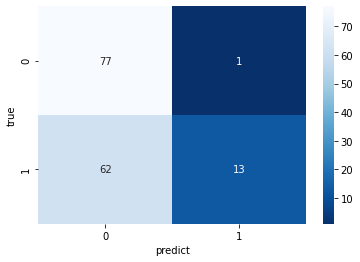

In [93]:
matrix_2 = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(matrix_2, annot = True, fmt = 'd', cmap = 'Blues_r')
plt.ylabel('true')
plt.xlabel('predict')

- удалось снизить количество ошибок первого рода с 54 до 9
- улучшили результат метрик
- Далее создадим новую тренировочную выборку, обучим на ней модель с новым порогом значение и получим предсказания на тестовой выборке
- значение precision вырасло - 0.9285714285714286

**С помощью обученной модели спрогнозируйте вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.**
- Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
- Получите прогноз вкуса молока коров.

In [94]:
# проделаем аналогичные шаги
cow_buy_lr_2 = cow_buy.copy(deep=True)

cow_buy_lr_2['эке'] = ferma_after['эке']
cow_buy_lr_2['эке^2'] = cow_buy_lr_2['эке'] ** 2
cow_buy_lr_2['сырой_протеин'] = ferma_after ['сырой_протеин']
cow_buy_lr_2['спо'] = ferma_after ['спо']
cow_buy_lr_2['спо_бинарный'] = cow_buy_lr_2['спо'].apply(lambda x: 1 if x > 0.91 else 0)

# Форматируем cow_buy
cow_buy_lr_2.rename(columns={'текущая_жирность': 'жирность', 'текущий_белок': 'белок'}, inplace=True)
cow_buy_lr_2 = cow_buy_lr_2.drop(['имя_папы', 'эке', 'спо'], axis=1)

# Подготовка признаков

cow_buy_lr_2.head()

,порода,тип_пастбища,порода_папы,жирность,белок,возраст,прогноз_удоя,эке^2,сырой_протеин,спо_бинарный
0,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,более_2_лет,6576.161541,233.208082,2018.417402,1
1,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.081,менее_2_лет,6312.136409,233.208082,2018.417402,1
2,РефлешнСоверинг,Равнинное,Соверин,3.59,3.074,более_2_лет,6278.855400,233.208082,2018.417402,1
3,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.061,более_2_лет,6588.259788,233.208082,2018.417402,1
4,РефлешнСоверинг,Равнинное,Айдиал,3.64,3.074,более_2_лет,6530.021415,233.208082,2018.417402,1


In [95]:
X_train_general.head()

,сырой_протеин,порода,тип_пастбища,порода_папы,жирность,белок,возраст,спо_бинарный,эке^2
0,1984,Вис Бик Айдиал,Равнинное,Айдиал,3.72,3.076,более_2_лет,1,198.81
1,1984,Вис Бик Айдиал,Равнинное,Айдиал,3.72,3.072,более_2_лет,1,246.49
2,2067,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.080,более_2_лет,1,249.64
3,2091,Вис Бик Айдиал,Равнинное,Соверин,3.72,3.076,более_2_лет,1,243.36
4,1721,РефлешнСоверинг,Равнинное,Соверин,3.61,3.076,более_2_лет,0,182.25


In [96]:

X_train_ohe = encoder.transform(X_train_general[word_columns])
X_test_ohe = encoder.transform(cow_buy_lr_2[word_columns])

X_train_scaler = scaler.transform(X_train_general[num_columns])
X_test_scaler = scaler.transform(cow_buy_lr_2[num_columns])

X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder.get_feature_names())
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder.get_feature_names())

X_train_scaler = pd.DataFrame(X_train_scaler, columns = num_columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = num_columns)

X_train_general = pd.concat([X_train_ohe, X_train_scaler], axis=1)
X_test_general = pd.concat([X_test_ohe, X_test_scaler], axis=1)

In [97]:
educ.fit(X_train_general, y_train_general)
y_proba = educ.predict_proba(X_test_general)[:, 1]
predict_end = (y_proba > optimal_thresholds).astype(int)

In [98]:
cow_buy['ожидаемый_вкус_молока'] = predict_end
cow_buy['ожидаемый_вкус_молока'] = cow_buy['ожидаемый_вкус_молока'].apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')
good_buy = cow_buy.query('ожидаемый_вкус_молока == "вкусно"')
display(cow_buy)

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,текущий_белок,возраст,прогноз_удоя,ожидаемый_вкус_молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6576.161541,не вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6312.136409,не вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6278.855400,не вкусно
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6588.259788,не вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6530.021415,не вкусно
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6349.370004,не вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6576.161541,не вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6536.913140,не вкусно
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6278.855400,не вкусно
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6363.483057,не вкусно


In [99]:
display(good_buy)

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,текущий_белок,возраст,прогноз_удоя,ожидаемый_вкус_молока


## Итоговые выводы

*В ходе работы над проектом была разработана модель машинного обучения, которая **предсказала не рассматривать покупку ни одной коровы**.*

In [100]:
display(good_buy)

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,текущий_белок,возраст,прогноз_удоя,ожидаемый_вкус_молока


*Главное для фермера было, чтобы корова давала больше 6000 кг молока, а ее молоко было вкусным. Проанализировав все данные, модель не смогла выдвинуть многовероятных кандидатов*

**Что касается самой модели:**
- была выбрана лучшая из трех моделей, значения ее метрик:
    - mse = **37926.164902385564**
    - mae = **146.277948445641**
    - rmse = **194.74641178308156**
    - доверительный интерал 97% лучшей модели равен (**6054.753944194411, 6211.74209937218**)
- для улучшения качества работы модели был подобран порог принадлежности
- метрики, которые важны для при анализе рисков или экономических расчётов:
    - precision (очень важно)
    - recall (очень важно)
    - accuracy (не сильно важно)

*Так же хочется добавить, чтобы улучшить модель, необходимо дать больше данных для коров, удой которых находится в диапазоне от 5750 до 6200 кг*

*Подводя итог: после предобработки и анализа была обучена и протестированна модель машинного обучения, которая советует фермеру не покупать ни одну из коров, опираясь на его требования*